<a href="https://colab.research.google.com/github/gaubeur/machine-learning/blob/master/Metrica_para_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/boston_house_prices.csv
Target (506,), Data (506, 13)
4061.8259284949268
52.259976445345536


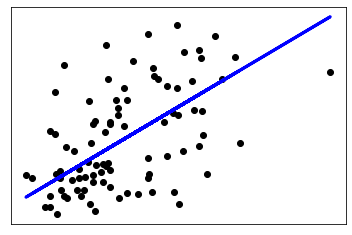

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_boston

dicionario_boston = load_boston()

print(dicionario_boston.keys())
print(dicionario_boston.feature_names)
print(dicionario_boston.filename)
print(f'Target {boston.target.shape}, Data {boston.data.shape}')

dataframe_boston = pd.DataFrame(dicionario_boston.data)
dataframe_boston.head()
      

# carrega do dataset 
x, y = datasets.load_diabetes(return_X_y=True)

#separa um atributo para usar
x = x[:, np.newaxis, 2]

#separa dados para testar
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#instancia
regr = linear_model.LinearRegression()

#treina o modelo
regr.fit(x_train, y_train)

#testa o modelo treinado
y_predict = regr.predict(x_test)

#metricas de qualidade
erro_quadratico = mean_squared_error(y_test, y_predict)
erro_absoluto   = mean_absolute_error(y_test, y_predict)

print(erro_quadratico)
print(erro_absoluto)

#grafico
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_predict, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
dataframe_boston = pd.DataFrame(dicionario_boston.data)
dataframe_boston.columns = dicionario_boston.feature_names
dataframe_boston['PRICE'] = dicionario_boston.target
dataframe_boston.head()
#dataframe_boston.info()
dataframe_boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
X, y = dataframe_boston.drop('PRICE', axis=1), dataframe_boston['PRICE']

In [ ]:
print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)
#previsões
Y_prev = regression.predict(X_test)

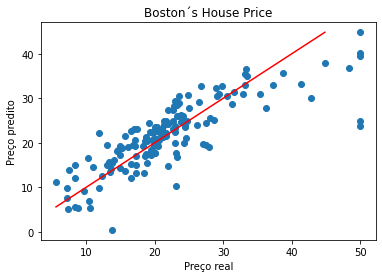

In [ ]:
plt.scatter(y_test, Y_prev)
range = [y_test.min(), Y_prev.max()]
plt.plot(range, range, 'red')
plt.title('Boston´s House Price')
plt.xlabel('Preço real')
plt.ylabel('Preço predito')
plt.show()

In [ ]:
print(f'MAE {mean_absolute_error(y_test, Y_prev)}')

MAE 3.609904060381819


In [ ]:
print(f'MSE {mean_squared_error(y_test, Y_prev)}')

MSE 27.195965766883308


In [ ]:
from sklearn.model_selection import cross_val_score
resultado = cross_val_score(regression, X_test, y_test, cv = 10)
print(f'Cross Validation {resultado.mean()*100}')

Cross Validation 51.428436959817795
